In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

Entramos en el portal de trasparencia del Ayuntamiento de Gijón. Ponemos "multas" en el buscador y nos aparecerán 4 archivos disponibles https://transparencia.gijon.es/risp_datasetsb

![](imgs/portal_trasparencia_ayto_Gijon_multas.png)

In [6]:
multas = pd.read_csv("data/original_data/658.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 1: invalid continuation byte

Los archivos "658.csv", "659.csv" y "660.csv" dan error de codificación: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 1: invalid continuation byte"
Es debido a que no están formateados en "UTF-8", que es la codificación que por defecto utiliza la función read_csv.

Utilizamos el comando "!file" el sistema para obtener en qué formato esta codificado el csv.

In [7]:
!file "data/original_data/658.csv"

data/original_data/658.csv: ISO-8859 text, with very long lines, with CRLF line terminators


Y volvemos a intentar importar el archivo (no funciona con "ISO-8859"; hay que especificar que es "ISO-8859-1")

In [9]:
multas = pd.read_csv("data/original_data/658.csv", encoding="ISO-8859-1")

Si utilizáis el comando "file" en la consola de bash o en el notebook así "!file" el sistema os devolverá la siguiente información: "xxx.csv: ISO-8859 text, with very long lines, with CRLF line terminators".

In [18]:
filesnames = ("data/original_data/658.csv", "data/original_data/659.csv","data/original_data/660.csv")

dfs = list()
for filename in filesnames:    
    multas_2015_2017 = pd.read_csv(filename, encoding="ISO-8859-1")    
    dfs.append(df)
frame = pd.concat(dfs, axis=0, ignore_index=True)
multas_2015_2017.head()

,TIPO,CALIFICACION,LUGAR,NUMERO,AÑO,MES,DIA,HORA,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD
0,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,1,12:35,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
1,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,2,23:14,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
2,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,3,09:43,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
3,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,4,02:20,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
4,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,4,02:28,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN


In [19]:
multas_2018 = pd.read_csv("data/original_data/661.csv")

In [20]:
multas = pd.concat([multas_2015_2017, multas_2018], axis=0)

In [21]:
multas.head()

,TIPO,CALIFICACION,LUGAR,NUMERO,AÑO,MES,DIA,HORA,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD
0,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,1,12:35,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
1,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,2,23:14,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
2,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,3,09:43,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
3,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,4,02:20,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN
4,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2017,1,4,02:28,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN


In [22]:
multas.columns

Index(['TIPO', 'CALIFICACION', 'LUGAR', 'NUMERO', 'AÑO', 'MES', 'DIA', 'HORA',
       'IMPORTE', 'DESCUENTO', 'PUNTOS', 'INFRACCION', 'VELOCIDAD',
       'VELOCIDAD_LIMITE', 'LATITUD', 'LONGITUD'],
      dtype='object')

Si observamos los formatos de las variables vemos, por ejemplo, tenemos el mes, el día y la hora separados 
en distintas variables. 

In [62]:
multas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66959 entries, 0 to 66958
Data columns (total 16 columns):
TIPO                66959 non-null object
CALIFICACION        66959 non-null object
LUGAR               66959 non-null object
NUMERO              43292 non-null float64
AÑO                 66959 non-null int64
MES                 66959 non-null int64
DIA                 66959 non-null int64
HORA                66959 non-null object
IMPORTE             66959 non-null int64
DESCUENTO           66959 non-null int64
PUNTOS              66959 non-null int64
INFRACCION          66959 non-null object
VELOCIDAD           36646 non-null object
VELOCIDAD_LIMITE    36646 non-null object
LATITUD             37759 non-null float64
LONGITUD            37759 non-null float64
dtypes: float64(3), int64(6), object(7)
memory usage: 8.2+ MB


Antes cambiamos los nombres de las variables para que la función que vamos a utilizar las reconozca

In [63]:
multas = multas.rename(columns={'AÑO':'year', 'MES':'month','DIA':'day'})

In [64]:
multas.columns

Index(['TIPO', 'CALIFICACION', 'LUGAR', 'NUMERO', 'year', 'month', 'day',
       'HORA', 'IMPORTE', 'DESCUENTO', 'PUNTOS', 'INFRACCION', 'VELOCIDAD',
       'VELOCIDAD_LIMITE', 'LATITUD', 'LONGITUD'],
      dtype='object')

In [ ]:
multas = multas.rename(columns={'AÑO':'year', 'MES':'month','DIA':'day'})

In [79]:
multas[['hora', 'minute']] = multas.HORA.str.split(pat = ":", n = 1, expand = True)

In [80]:
multas.head()

,TIPO,CALIFICACION,LUGAR,NUMERO,AÑO,MES,DIA,HORA,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD,hora,minute
0,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,00:05,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,00,05
1,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,00:40,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,00,40
2,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,01:28,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,01,28
3,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,01:47,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,01,47
4,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,02:23,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,02,23


In [5]:

multas = pd.read_csv("data/original_data/661.csv")
multas = multas.rename(columns={'AÑO':'year', 'MES':'month','DIA':'day'})
multas[['hour', 'minute']] = multas.HORA.str.split(pat = ":", n = 1, expand = True)
multas['date'] = pd.to_datetime(multas[['year', 'month', 'day']])
multas['date_time'] = pd.to_datetime(multas[['year', 'month', 'day', 'hour', 'minute']])
multas.head()

,TIPO,CALIFICACION,LUGAR,NUMERO,year,month,day,HORA,IMPORTE,DESCUENTO,PUNTOS,INFRACCION,VELOCIDAD,VELOCIDAD_LIMITE,LATITUD,LONGITUD,hour,minute,date,date_time
0,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,00:05,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,00,05,2018-01-01,2018-01-01 00:05:00
1,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,00:40,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,00,40,2018-01-01,2018-01-01 00:40:00
2,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,01:28,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,01,28,2018-01-01,2018-01-01 01:28:00
3,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,01:47,90,45,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,01,47,2018-01-01,2018-01-01 01:47:00
4,Cimadevilla,Leve,BARRIO CIMADEVILLA GIJON,NaN,2018,1,1,02:23,90,0,0,"PERMANECER EN EL CASCO ANTIGUO DE CIMADEVILLA,...",NaN,NaN,NaN,NaN,02,23,2018-01-01,2018-01-01 02:23:00


In [88]:
multas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66959 entries, 0 to 66958
Data columns (total 20 columns):
TIPO                66959 non-null object
CALIFICACION        66959 non-null object
LUGAR               66959 non-null object
NUMERO              43292 non-null float64
year                66959 non-null int64
month               66959 non-null int64
day                 66959 non-null int64
HORA                66959 non-null object
IMPORTE             66959 non-null int64
DESCUENTO           66959 non-null int64
PUNTOS              66959 non-null int64
INFRACCION          66959 non-null object
VELOCIDAD           36646 non-null object
VELOCIDAD_LIMITE    36646 non-null object
LATITUD             37759 non-null float64
LONGITUD            37759 non-null float64
hour                66959 non-null object
minute              66959 non-null object
date                66959 non-null datetime64[ns]
date_time           66959 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3),

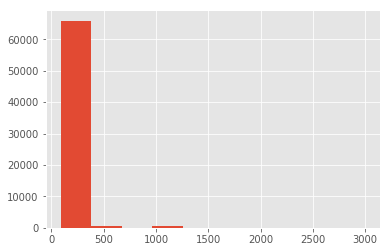

In [6]:
plt.hist(multas['IMPORTE'])
plt.show()

In [99]:
multas['IMPORTE'].max()

3000

In [100]:
multas['IMPORTE'].min()

90

In [101]:
multas['IMPORTE'].median()

100.0

In [30]:
importes = multas[['IMPORTE']]

importes = importes.astype('object')

importes.groupby('IMPORTE').count()

""
IMPORTE
90
100
200
300
400
500
600
1000
3000


In [ ]:
multas.IMPORTE.astype('object').count()

In [128]:
multas.describe()

,NUMERO,year,month,day,IMPORTE,DESCUENTO,PUNTOS,LATITUD,LONGITUD
count,43292.000000,66959.0,66959.000000,66959.000000,66959.000000,66959.000000,66959.000000,37759.000000,37759.000000
mean,184.407581,2018.0,6.345898,15.598486,123.261399,41.474783,0.261294,43.532691,-5.669160
std,858.931659,0.0,3.247558,8.720667,93.322836,38.741095,0.990685,0.007825,0.016170
min,1.000000,2018.0,1.000000,1.000000,90.000000,0.000000,0.000000,43.485325,-5.716753
25%,9.000000,2018.0,4.000000,8.000000,90.000000,0.000000,0.000000,43.524586,-5.682149
50%,15.000000,2018.0,6.000000,16.000000,100.000000,50.000000,0.000000,43.536301,-5.668449
75%,41.000000,2018.0,9.000000,23.000000,100.000000,50.000000,0.000000,43.539111,-5.655689
max,9450.000000,2018.0,12.000000,31.000000,3000.000000,500.000000,6.000000,43.553975,-5.594062


In [35]:
tabla_importes = multas.groupby('IMPORTE').count()[['TIPO']]
tabla_importes

,TIPO
IMPORTE,
90,20584
100,35330
200,8877
300,1118
400,157
500,395
600,8
1000,489
3000,1


In [47]:
tabla_importes = pd.DataFrame(tabla_importes)
tabla_importes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 90 to 3000
Data columns (total 1 columns):
TIPO    9 non-null int64
dtypes: int64(1)
memory usage: 144.0 bytes


In [51]:
importes = index(tabla_importes)
plt.bar(tabla_importes['TIPO'])
plt.xticks(tabla_importes['IMPORTE'])

NameError: name 'index' is not defined